<a href="https://colab.research.google.com/gist/DanaGoro66/0c00c72ae4fede812674be465e199f3c/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Water Park Project

In [ ]:
print("sync test from py")

In [ ]:
import numpy as np
import copy
import random
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import probplot, norm, kstest, expon
from IPython.display import HTML, display
from google.colab import files
from datetime import time, datetime, timedelta
from collections import deque
import heapq

# כתיבת קוד למציאת התפלגויות ומבחני טיב התאמה לזמני התגלשות במגלשות האבובים הקטנה והגדולה

Saving samples for course project.xlsx to samples for course project (7).xlsx
=== SMALL SLIDE – Exponential model ===
λ_MLE (lambda)            = 2.107060
Theoretical mean (1/λ)    = 0.474595



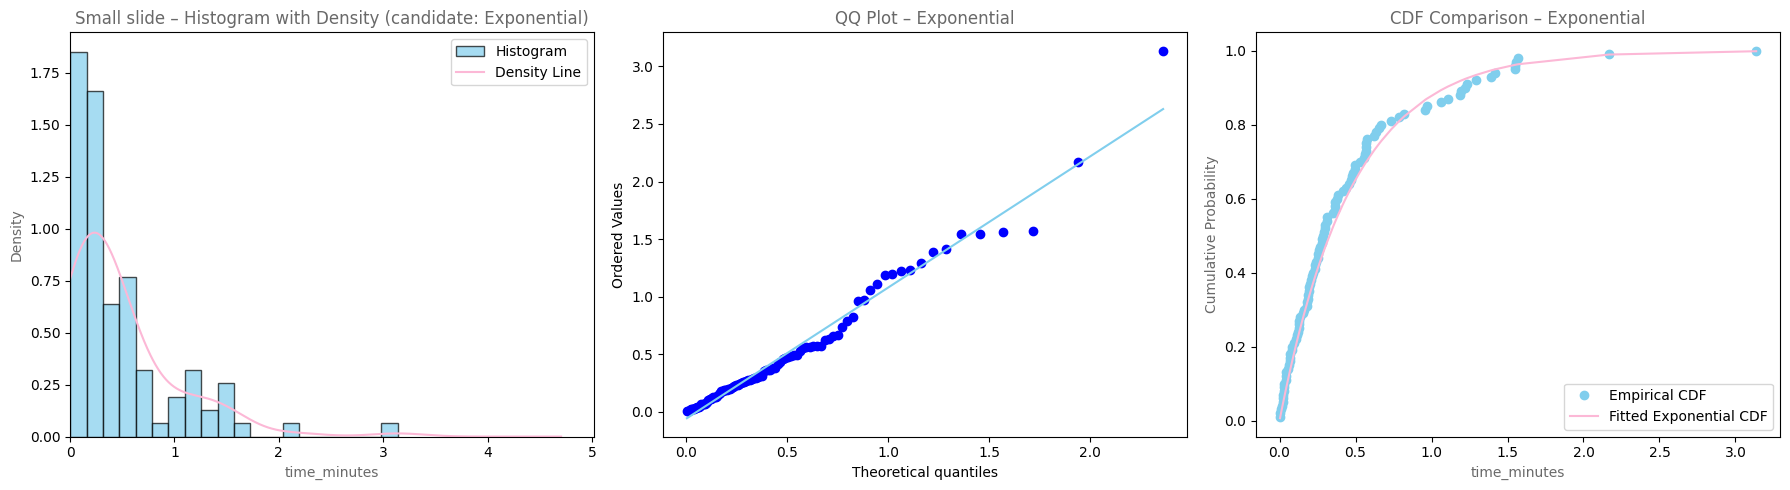

=== BIG SLIDE – Normal model ===
μ_MLE (mean)           = 4.800664
σ^2_MLE (variance)     = 3.323697
σ_MLE (std deviation)  = 1.823101



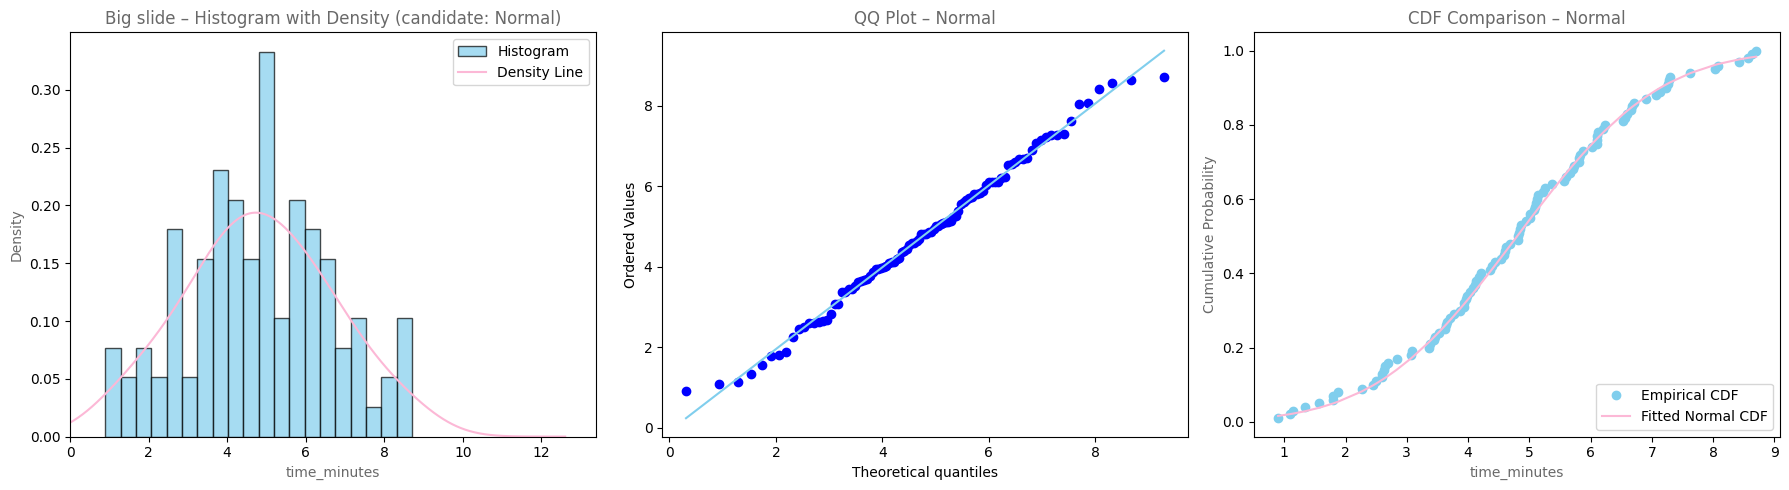

In [ ]:
# =====================================
# 1. Loading data from file
# =====================================

uploaded = files.upload()
excel_file = list(uploaded.keys())[0]
xls = pd.ExcelFile(excel_file)
xls.sheet_names

# Converting the tables to a data structure
big_slide_df   = pd.read_excel(xls, xls.sheet_names[0])
small_slide_df = pd.read_excel(xls, xls.sheet_names[1])

# Taking the time column only
big_data   = big_slide_df['time_minutes'].values
small_data = small_slide_df['time_minutes'].values

alpha = 0.1  # Statistical significance (90% confidence level)

# =====================================
# 2. Graphs
# =====================================

def histogram_and_density_line(data, label, ax, candidate_dist=''):
    unified_blue = "#80CEED"
    unified_pink = "#FCB8D6"

    # Histogram
    ax.hist(
        data,
        bins=20,
        edgecolor='black',
        alpha=0.7,
        density=True,
        label='Histogram',
        color=unified_blue
    )

    # Density line
    pd.Series(data).plot(
        kind='kde',
        color=unified_pink,
        label='Density Line',
        bw_method=0.5,
        ax=ax
    )

    # Headline
    title = f"{label} – Histogram with Density"
    if candidate_dist:
        title += f" (candidate: {candidate_dist})"
    ax.set_title(title, color='dimgray')
    ax.set_xlabel("time_minutes", color='dimgray')
    ax.set_ylabel("Density", color='dimgray')
    ax.set_xlim(left=0)
    ax.legend()

# QQ
def QQ_plot_exponential(data, lambda_mle, ax):
    unified_blue = "#80CEED"
    # expon: (loc, scale) = (0, 1/lambda)
    probplot(data, dist="expon", sparams=(0, 1/lambda_mle), plot=ax)
    ax.get_lines()[1].set_color(unified_blue)
    ax.set_title("QQ Plot – Exponential", color='dimgray')

def QQ_plot_normal(data, mu_mle, sigma_mle, ax):
    unified_blue = "#80CEED"
    # norm: (loc, scale) = (mu, sigma)
    probplot(data, dist="norm", sparams=(mu_mle, sigma_mle), plot=ax)
    ax.get_lines()[1].set_color(unified_blue)
    ax.set_title("QQ Plot – Normal", color='dimgray')

## CDF
def CDF_plot_exponential(data, lambda_mle, ax):
    unified_pink = "#FCB8D6"
    unified_blue = "#80CEED"

    sorted_data = np.sort(data)
    n = len(data)
    empirical_cdf_vals = np.arange(1, n+1) / n
    cdf_fitted = expon.cdf(sorted_data, loc=0, scale=1/lambda_mle)

    ax.plot(
        sorted_data,
        empirical_cdf_vals,
        marker='o',
        linestyle='',
        label='Empirical CDF',
        color=unified_blue
    )
    ax.plot(
        sorted_data,
        cdf_fitted,
        '-',
        label='Fitted Exponential CDF',
        color=unified_pink
    )
    ax.set_title("CDF Comparison – Exponential", color='dimgray')
    ax.set_xlabel("time_minutes", color='dimgray')
    ax.set_ylabel("Cumulative Probability", color='dimgray')
    ax.legend(loc='lower right')

def CDF_plot_normal(data, mu_mle, sigma_mle, ax):
    unified_pink = "#FCB8D6"
    unified_blue = "#80CEED"

    sorted_data = np.sort(data)
    n = len(data)
    empirical_cdf_vals = np.arange(1, n+1) / n
    cdf_fitted = norm.cdf(sorted_data, loc=mu_mle, scale=sigma_mle)

    ax.plot(
        sorted_data,
        empirical_cdf_vals,
        marker='o',
        linestyle='',
        label='Empirical CDF',
        color=unified_blue
    )
    ax.plot(
        sorted_data,
        cdf_fitted,
        '-',
        label='Fitted Normal CDF',
        color=unified_pink
    )
    ax.set_title("CDF Comparison – Normal", color='dimgray')
    ax.set_xlabel("time_minutes", color='dimgray')
    ax.set_ylabel("Cumulative Probability", color='dimgray')
    ax.legend(loc='lower right')

# =====================================
# 3. Small Slide – Exponential (graphs & parameters)
# =====================================

# MLE for exponential
lambda_small_mle = 1 / np.mean(small_data)
theoretical_mean_small = 1 / lambda_small_mle

print("=== SMALL SLIDE – Exponential model ===")
print(f"λ_MLE (lambda)            = {lambda_small_mle:.6f}")
print(f"Theoretical mean (1/λ)    = {theoretical_mean_small:.6f}")
print()

display(HTML("<h2 style='text-align: center; color: #FCB8D6;'>Small Slide – Exponential Fit</h2>"))
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

histogram_and_density_line(small_data, "Small slide", axs[0], candidate_dist='Exponential')
QQ_plot_exponential(small_data, lambda_small_mle, axs[1])
CDF_plot_exponential(small_data, lambda_small_mle, axs[2])

plt.tight_layout()
plt.show()

# =====================================
# 4. Big Slide – Normal (graphs & parameters)
# =====================================

# MLE for normal
mu_big_mle    = np.mean(big_data)
sigma_big_mle = np.std(big_data, ddof=0)
var_big_mle   = sigma_big_mle**2

print("=== BIG SLIDE – Normal model ===")
print(f"μ_MLE (mean)           = {mu_big_mle:.6f}")
print(f"σ^2_MLE (variance)     = {var_big_mle:.6f}")
print(f"σ_MLE (std deviation)  = {sigma_big_mle:.6f}")
print()

display(HTML("<h2 style='text-align: center; color: #FCB8D6;'>Big Slide – Normal Fit</h2>"))
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

histogram_and_density_line(big_data, "Big slide", axs[0], candidate_dist='Normal')
QQ_plot_normal(big_data, mu_big_mle, sigma_big_mle, axs[1])
CDF_plot_normal(big_data, mu_big_mle, sigma_big_mle, axs[2])

plt.tight_layout()
plt.show()

# ניתוח ההתפלגות עבור זמן התגלשות במגלשת האבובים הקטנה

**היסטוגרמה:**

כאשר ניתחנו את הנתונים מקובץ האקסל ושמנו אותם על הגרף, נכחנו לגלות כי ההיסטוגרמה מציגה דפוס הדומה להתפלגות אקספוננציאלית - ריכוז התצפיות הגדול ביותר מתכנס סביב הערכים 0-1 דקות וככל שמתקדמים לערכים גבוהים יותר בציר האיקס שמסמן דקות, השכיחות הולכת ונהיית נמוכה יותר, מאפיין התואם להתפלגות אקספוננציאלית.



---

**QQ Plot:**

בגרף זה, ניתן לראות התאמה בעיקר לערכים הנמוכים של ההתפלגות. כאשר נתקדם לערכים גבוהים יותר, יש סטייה של התצפיות מהקו התיאורטי של ההתפלגות, המעידה על אי התאמה חלקית להתפלגות באיזורים הנ"ל.

---

**פונקצייה מצטברת:**

גם בהשוואה הסופית שלנו - בין התצפיות לבין פונקצייה מצטברת של התפלגות אקספוננציאלית, יש התאמה טובה יחסית ונראה כי הרוב המוחלט של התצפיות נמצא על הגרף. נשים לב כי עד ערכי חצי דקה, התצפיות מדויקות יותר וכאשר נתבונן בתצפיות גבוהות יותר, הן הולכות ונהיות יותר מפוזרות.

---

**סיכום:**

המדגם כולל 100 תצפיות, שזהו מדגם קטן יחסית ולמרות זאת, בעזרת הכלים הגרפיים והסטטיסטיים המתאימים נראה כי קיימת סבירות גבוהה לכך שזמן ההתגלשות במגלשת האבובים הקטנה מתפלג אקספוננציאלית.


# MLE for Exponential distribution


##  **פונקציית צפיפות :**

פונקציית הצפיפות של ההתפלגות המעריכית מוגדרת כך:

$$
f(x; \lambda) =
\begin{cases}
\lambda e^{-\lambda x}, & x \geq 0 \\
0, & x < 0
\end{cases}
$$

כאשר הפרמטר של קצב ההתפלגות גדול מאפס.

---

##  **פונקציית הנראות:**

בהינתן מדגם בגודל \( n \):
$$
x_1, x_2, \dots, x_n
$$
פונקציית הנראות היא:

$$
L(\lambda) = \prod_{i=1}^n \lambda e^{-\lambda x_i} = \lambda^n e^{-\lambda \sum_{i=1}^n x_i}
$$

---

##  **פונקציית הלוג של פונקציית הנראות:**

ניקח לוגריתם טבעי (ln) לפונקציית הנראות:

$$
\ell(\lambda) = \ln L(\lambda) = n \ln(\lambda) - \lambda \sum_{i=1}^n x_i
$$

---

##  **מציאת אומדן λ (אומד נראות מקסימלי):**

נגזור את פונקציית הלוג לפי $\lambda$, ונשווה לאפס:

$$
\frac{d\ell(\lambda)}{d\lambda} = \frac{n}{\lambda} - \sum_{i=1}^n x_i = 0
$$

נבודד את $\lambda$:

$$
\lambda = \frac{n}{\sum_{i=1}^n x_i} = \frac{1}{\bar{x}}
$$

כאשר $\bar{x}$ הוא הממוצע של המדגם.

---

##  **מסקנה:**

אומד הנראות המקסימלי של  $\lambda$ הוא:

$$
\lambda_{MLE} = \frac{1}{\bar{x}}
$$

</div>


# ניתוח ההתפלגות עבור זמן התגלשות במגלשת האבובים הגדולה



**היסטוגרמה:**

כאשר ניתחנו את הנתונים מקובץ האקסל ושמנו אותם על הגרף, נכחנו לגלות כי ההיסטוגרמה מציגה דפוס הדומה להתפלגות נורמלית - רוב התצפיות מתכנסות סביב הערכים 3-5 וככל שמתרחקים מערכים אלו, ריכוז התצפיות יורד, באופן יחסית סימטרי, מאפיין התואם להתפלגות נורמלית.



---

**QQ Plot**

בגרף זה ניתן לראות בעיקר התאמה לערכים סביב הממוצע של ההתפלגות. כאשר נתקדם ל-2 זנבות הגרף, יש סטייה של התצפיות מהקו התיאורטי של ההתפלגות, המעידה על אי התאמה חלקית להתפלגות באיזורי הזנבות.

---

**פונקצייה מצטברת:**

גם בהשוואה הסופית שלנו - בין התצפיות לבין פונקצייה מצטברת של התפלגות נורמלית, יש התאמה טובה יחסית ונראה כי הרוב המוחלט של התצפיות נמצא על הגרף או במיקום קרוב יחסית לגרף.

---

**סיכום:**

המדגם כולל 100 תצפיות, שזהו מדגם קטן יחסית ולמרות זאת, בעזרת הכלים הגרפיים והסטטיסטיים המתאימים נראה כי קיימת סבירות גבוהה לכך שזמן ההתגלשות במגלשת האבובים הגדולה מתפלג נורמלית.


# MLE for Normal distribution


## **פונקציית צפיפות:**

התפלגות נורמלית מאופיינת על ידי שני פרמטרים: הממוצע ($\mu$) וסטיית התקן ($\sigma$). פונקציית הצפיפות שלה מוגדרת כך:

$$
f(x; \mu, \sigma^2) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(x - \mu)^2}{2 \sigma^2}}
$$

כאשר $\mu \in (-\infty, \infty)$ , $\sigma^2 > 0$.

---

## **פונקציית הנראות:**

בהינתן מדגם של משתנים בלתי תלויים וזהים בהתפלגותם  בגודל $n$:
$$
\mathbf{x} = (x_1, x_2, \dots, x_n)
$$
פונקציית הנראות $L(\mu, \sigma^2)$ היא מכפלת פונקציות הצפיפות עבור כל תצפית:

$$
L(\mu, \sigma^2) = \prod_{i=1}^n f(x_i; \mu, \sigma^2)
$$

נציב את פונקציית הצפיפות הנורמלית:

$$
L(\mu, \sigma^2) = \prod_{i=1}^n \left( \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(x_i - \mu)^2}{2 \sigma^2}} \right)
$$

$$
L(\mu, \sigma^2) = \left( \frac{1}{2 \pi \sigma^2} \right)^{n/2} e^{-\sum_{i=1}^n \frac{(x_i - \mu)^2}{2 \sigma^2}}
$$

---

## **פונקציית הלוג של פונקציית הנראות:**

ניקח לוגריתם טבעי ($\ln$) לפונקציית הנראות ($\ell(\mu, \sigma^2) = \ln L(\mu, \sigma^2)$). הדבר מפשט את המכפלה לסכום:

$$
\ell(\mu, \sigma^2) = \ln \left[ \left( 2 \pi \sigma^2 \right)^{-n/2} \cdot e^{-\frac{1}{2 \sigma^2} \sum_{i=1}^n (x_i - \mu)^2} \right]
$$

על פי חוקי הלוגריתמים: $\ln(a \cdot b) = \ln(a) + \ln(b)$ ו- $\ln(a^b) = b \ln(a)$:

$$
\ell(\mu, \sigma^2) = -\frac{n}{2} \ln(2 \pi \sigma^2) - \frac{1}{2 \sigma^2} \sum_{i=1}^n (x_i - \mu)^2
$$

---

## **מציאת אומדן $\mu$ (אומד נראות מקסימלי):**

נגזור את פונקציית הלוג של הנראות לפי $\mu$ ונשווה לאפס:

$$
\frac{\partial \ell}{\partial \mu} = \frac{\partial}{\partial \mu} \left[ -\frac{n}{2} \ln(2 \pi \sigma^2) - \frac{1}{2 \sigma^2} \sum_{i=1}^n (x_i - \mu)^2 \right] = 0
$$

האיבר הראשון אינו תלוי ב-$\mu$ ולכן נגזרתו אפס. נגזור את האיבר השני:

$$
\frac{\partial \ell}{\partial \mu} = - \frac{1}{2 \sigma^2} \sum_{i=1}^n 2 (x_i - \mu) (-1) = 0
$$

נצמצם ונסדר:

$$
\frac{1}{\sigma^2} \sum_{i=1}^n (x_i - \mu) = 0
$$

מכיוון ש-$\sigma^2 > 0$, נחלק ב-$\frac{1}{\sigma^2}$:

$$
\sum_{i=1}^n (x_i - \mu) = 0
$$

נחלק את הסכום לשני חלקים:

$$
\sum_{i=1}^n x_i - \sum_{i=1}^n \mu = 0
$$

ומכיוון ש-$\mu$ היא קבוע בסכימה:

$$
\sum_{i=1}^n x_i - n \mu = 0
$$

נבודד את $\mu$:

$$
\hat{\mu}_{MLE} = \frac{1}{n} \sum_{i=1}^n x_i
$$

---

## **מציאת אומדן $\sigma^2$ (אומד נראות מקסימלי):**

נגזור את פונקציית הלוג של הנראות לפי $\sigma^2$ (נחשוב על $\sigma^2$ כמשתנה יחיד, נסמנו $v = \sigma^2$) ונשווה לאפס.

$$
\frac{\partial \ell}{\partial v} = \frac{\partial}{\partial v} \left[ -\frac{n}{2} \ln(2 \pi v) - \frac{1}{2 v} \sum_{i=1}^n (x_i - \mu)^2 \right] = 0
$$

נגזור איבר איבר:
* $\frac{\partial}{\partial v} \left[ -\frac{n}{2} \ln(2 \pi v) \right] = -\frac{n}{2} \cdot \frac{1}{2 \pi v} \cdot 2 \pi = -\frac{n}{2 v}$
* $\frac{\partial}{\partial v} \left[ - \frac{1}{2 v} \sum_{i=1}^n (x_i - \mu)^2 \right] = - \sum_{i=1}^n (x_i - \mu)^2 \cdot \frac{\partial}{\partial v} \left( \frac{1}{2} v^{-1} \right) = - \sum_{i=1}^n (x_i - \mu)^2 \cdot \left( -\frac{1}{2} v^{-2} \right) = \frac{1}{2 v^2} \sum_{i=1}^n (x_i - \mu)^2$

נשווה לאפס:

$$
-\frac{n}{2 v} + \frac{1}{2 v^2} \sum_{i=1}^n (x_i - \mu)^2 = 0
$$

נכפיל ב-$2v^2$ ונסדר:

$$
-n v + \sum_{i=1}^n (x_i - \mu)^2 = 0
$$

נבודד את $v$ (שהוא $\sigma^2$):

$$
\hat{v} = \hat{\sigma}^2_{MLE} = \frac{1}{n} \sum_{i=1}^n (x_i - \mu)^2
$$

נציב את אומדן ה-MLE של $\mu$ שמצאנו ($\hat{\mu}_{MLE} = \bar{x}$) במקום $\mu$:

$$
\hat{\sigma}^2_{MLE} = \frac{1}{n} \sum_{i=1}^n (x_i - \bar{x})^2
$$

---

## **מסקנה:**

אומדי הנראות המקסימליים של הפרמטרים $\mu$ ו-$\sigma^2$ עבור התפלגות נורמלית הם:

* **אומדן $\mu$ (הממוצע):**
$$
\hat{\mu}_{MLE} = \frac{1}{n} \sum_{i=1}^n x_i
$$
* **אומדן $\sigma^2$ (השונות):**
    $$
    \hat{\sigma}^2_{MLE} = \frac{1}{n} \sum_{i=1}^n (x_i - \bar{x})^2
    $$

---

# מבחני KS לצורך אישור בדיקת התאמת ההתפלגויות

In [ ]:
# =====================================
# 5. KS Goodness-of-Fit Tests
# =====================================

# KS for exponential – Small Slide
ks_stat_small_exp, p_value_small_exp = kstest(small_data, 'expon', args=(0, 1/lambda_small_mle))

decision_small = "Reject H0" if p_value_small_exp < alpha else "Fail to reject H0"

print("Kolmogorov-Smirnov test – SMALL vs Exponential:")
print(f"KS - D statistic = {ks_stat_small_exp:.6f}")
print(f"p-value      = {p_value_small_exp:.6f}")
print(f"Decision at alpha={alpha}: {decision_small}")
print("\n" + "="*60 + "\n")

# KS for normal – Big Slide
ks_stat_big_norm, p_value_big_norm = kstest(big_data, 'norm', args=(mu_big_mle, sigma_big_mle))

decision_big = "Reject H0" if p_value_big_norm < alpha else "Fail to reject H0"

print("Kolmogorov-Smirnov test – BIG vs Normal:")
print(f"KS - D statistic = {ks_stat_big_norm:.6f}")
print(f"p-value      = {p_value_big_norm:.6f}")
print(f"Decision at alpha={alpha}: {decision_big}")

Kolmogorov-Smirnov test – SMALL vs Exponential:
KS - D statistic = 0.068455
p-value      = 0.710573
Decision at alpha=0.1: Fail to reject H0


Kolmogorov-Smirnov test – BIG vs Normal:
KS - D statistic = 0.036953
p-value      = 0.998451
Decision at alpha=0.1: Fail to reject H0


## מבחן KS עבור בדיקת התאמה של זמן ההתגלשות במגלשה הקטנה להתפלגות אקפוננציאלית

הסטטיסטי שיצא במבחן:

$D = 0.068455$

מובהקות התוצאה:

$P_{\text{value}} = 0.710573$

רמת מובהקות המבחן:

10%

מכיוון ש־$0.1 < P_{\text{value}}$, **אין לנו מספיק עדות לדחות את השערת האפס**, ולכן ניתן לומר שהנתונים מתאימים להתפלגות אקספוננציאלית עם הפרמטר שחושב.


---




## מבחן KS עבור בדיקת התאמה של זמן ההתגלשות במגלשה הגדולה להתפלגות נורמלית

הסטטיסטי שיצא במבחן:

$D = 0.036953$

מובהקות התוצאה:

$P_{\text{value}} = 0.998451$

רמת מובהקות המבחן:

10%

מכיוון ש־$0.1 < P_{\text{value}}$, **אין לנו מספיק עדות לדחות את השערת האפס**, ולכן ניתן לומר שהנתונים מתאימים להתפלגות נורמלית עם הפרמטרים שחושבו.


---




# Sampling Algorithms

### 1. Distribution of the Number of Children in a Family
Let $X$ be the age, which follows a discrete uniform distribution
for the integer range $[a, b]$, where: $a=1, b=5$



**Total number of outcomes:**
$$
n = b - a + 1 = 5 - 1 + 1 = 5
$$

**Probability for each individual value:**
$$
P(X=k) = \frac{1}{n} = \frac{1}{5}
$$

**The Transformation:**
To obtain discrete values from the continuous variable $U$, we divide the interval $[0,1]$ into $n$ equal parts and use the **floor function** to ensure rounding down (as the number of children must be an integer):

$$
x = a + \lfloor (b - a + 1) \cdot U \rfloor
$$

For the given data ($a=1, n=5$):
$$
x = 1 + \lfloor 5U \rfloor
$$

## Sampling Algorithm:
1. Sample $U \sim U[0,1)$.
2. Return $x = 1 + \lfloor 5U \rfloor$.


##

### 2. Distribution Of Children's Age
Let $X$ be the age, which follows a Continuous Uniform Distribution
for the range $[a, b]$ where: $a=2, b=18$


**Probability Density Function (PDF):**
$$
f(x) = \frac{1}{b - a} = \frac{1}{18-2}= \frac{1}{16}
$$

**Cumulative Distribution Function (CDF) for Continuous Uniform:**
$$
F(x) = \frac{x - a}{b - a} = u
$$

**Solving for $x$:**
$$
x - a = u(b - a) \\
x = a + (b - a)u
$$

For the given values ($a=2, b=18$):
$$
x = 2 + 16u
$$

## Sampling Algorithm:
1. Sample $U \sim [0,1]$.
2. Return $x = 2 + 16u$.

##

##3. Family Arrival Rate

## Probability Density Function
Let $X$ be the time until the family leaves, following an Exponential distribution with rate parameter $\lambda = \frac{3}{2}$.
$$
f(x) = \begin{cases}
\frac{3}{2}e^{-\frac{3}{2}x} & x \ge 0 \\
0 & \text{else}
\end{cases}
$$

## Calculating the Cumulative Distribution Function:
We calculate the CDF by integrating the PDF from the lower bound ($0$) to $x$:


$$
F(x) = \int_{0}^{x} \frac{3}{2}e^{-\frac{3}{2}t} \, dt = \left[ -e^{-\frac{3}{2}t} \right]_{0}^{x} = \left( -e^{-\frac{3}{2}x} \right) - \left( -e^{0} \right) = 1 - e^{-\frac{3}{2}x}
$$



### Finding $x$ (Inverse Transform)
To generate samples, we find the inverse function by setting $F(x) = u$ and solving for $x$:

$$
1 - e^{-\frac{3}{2}x} = u
$$


$$
e^{-\frac{3}{2}x} = 1 - u
$$

Take the natural logarithm ($\ln$) of both sides:
$$
-\frac{3}{2}x = \ln(1 - u)
$$


$$
x = -\frac{2}{3}\ln(1 - u)
$$



## Sampling Algorithm
1.Generate a random number $U$ from a uniform distribution: $U \sim [0,1]$.

2.Calculate $x$ using the derived formula: $$x = -\frac{2}{3}\ln(1 - U)$$
   

##

## 4. Family Leaving Time
## Probability Density Function
The PDF as given:

$$
f(x) = \begin{cases}
\frac{2}{9}(x - 16) & 16 \le x \le 19 \\
0 & \text{else}
\end{cases}
$$

## Calculating the Cumulative Distribution Function
We calculate the CDF by integrating the PDF from the lower bound (16) to $x$.
The integration steps are condensed below:

$$
F(x) = \int_{16}^{x} \frac{2}{9}(t - 16) \, dt = \left[ \frac{t^2}{9} - \frac{32t}{9} \right]_{16}^{x} = \left( \frac{x^2}{9} - \frac{32x}{9} \right) - \left( \frac{256}{9} - \frac{512}{9} \right) = \frac{x^2}{9} - \frac{32x}{9} + \frac{256}{9}
$$

---

### Finding $x$ (Inverse Transform)
To find the inverse function, we set $F(x) = u$ and solve for $x$.
$$
\frac{x^2}{9} - \frac{32x}{9} + \frac{256}{9} = u \quad \Rightarrow \quad x^2 - 32x + (256 - 9u) = 0
$$

Using the quadratic formula (selecting the positive root since $x \ge 16$):
$$
x = \frac{32 + \sqrt{(-32)^2 - 4(1)(256 - 9u)}}{2} = \frac{32 + \sqrt{36u}}{2} = \frac{32 + 6\sqrt{u}}{2}
$$

$$
x = 16 + 3\sqrt{u}
$$

## Sampling Algorithm
1. Generate $U$ from a uniform distribution: $U \sim [0,1]$.
2. Calculate $x$ using the derived formula:  $$x = 16 + 3\sqrt{U}$$

###

###5. Number Of Teenagers In Group
## Sampling Algorithm

1. Generate $U$ from a uniform distribution: $U \sim [0,1]$.
  

2. Determine the value of $X$ based on the interval in which $U$ falls:

   * If $0 \le U \le 0.20$ $\Rightarrow$ Return $X = 2$
   * Else If $0.20 < U \le 0.4$ $\Rightarrow$ Return $X = 3$
   * Else If $0.40 < U \le 0.65$ $\Rightarrow$ Return $X = 4$
   * Else If $0.65 < U \le 0.90$ $\Rightarrow$ Return $X = 5$
   * Else  $\Rightarrow$ Return $X = 6$


   ##

###6. Teenagers Arrival Rate

## Probability Density Function
Let $X$ be the time teengares arrive, following an Exponential distribution with rate parameter $\lambda = \frac{18}{25}$.
$$
f(x) = \begin{cases}
\frac{18}{25}e^{-\frac{18}{25}x} & x \ge 0 \\
0 & \text{else}
\end{cases}
$$

## Calculating the Cumulative Distribution Function:
We calculate the CDF by integrating the PDF from the lower bound ($0$) to $x$:

$$
F(x) = \int_{0}^{x} \frac{18}{25}e^{-\frac{18}{25}t} \, dt = \left[ -e^{-\frac{18}{25}t} \right]_{0}^{x} = \left( -e^{-\frac{18}{25}x} \right) - \left( -e^{0} \right) = 1 - e^{-\frac{18}{25}x}
$$

### Finding $x$ (Inverse Transform)
To generate samples, we find the inverse function by setting $F(x) = u$ and solving for $x$:

$$
1 - e^{-\frac{18}{25}x} = u
$$

$$
e^{-\frac{18}{25}x} = 1 - u
$$

Take the natural logarithm ($\ln$) of both sides:
$$
-\frac{18}{25}x = \ln(1 - u)
$$

$$
x = -\frac{25}{18}\ln(1 - u)
$$

## Sampling Algorithm
1.Generate a random number $U$ from a uniform distribution: $U \sim [0,1]$.

2.Calculate $x$ using the derived formula: $$x = -\frac{25}{18}\ln(1 - U)$$

##

###7. Solo Visitors Arrival Rate


## Probability Density Function
Let $X$ be the time solo visitors arrive, following an Exponential distribution with rate parameter $\lambda = \frac{3}{2}$.
$$
f(x) = \begin{cases}
\frac{3}{2}e^{-\frac{3}{2}x} & x \ge 0 \\
0 & \text{else}
\end{cases}
$$

## Calculating the Cumulative Distribution Function:
We calculate the CDF by integrating the PDF from the lower bound ($0$) to $x$:


$$
F(x) = \int_{0}^{x} \frac{3}{2}e^{-\frac{3}{2}t} \, dt = \left[ -e^{-\frac{3}{2}t} \right]_{0}^{x} = \left( -e^{-\frac{3}{2}x} \right) - \left( -e^{0} \right) = 1 - e^{-\frac{3}{2}x}
$$



### Finding $x$ (Inverse Transform)
To generate samples, we find the inverse function by setting $F(x) = u$ and solving for $x$:

$$
1 - e^{-\frac{3}{2}x} = u
$$


$$
e^{-\frac{3}{2}x} = 1 - u
$$

Take the natural logarithm ($\ln$) of both sides:
$$
-\frac{3}{2}x = \ln(1 - u)
$$


$$
x = -\frac{2}{3}\ln(1 - u)
$$



## Sampling Algorithm
1.Generate a random number $U$ from a uniform distribution: $U \sim [0,1]$.

2.Calculate $x$ using the derived formula: $$x = -\frac{2}{3}\ln(1 - U)$$
   
##

###8. Buying A Ticket

Let $X$ be the time buying a ticket, which follows a Continuous Uniform Distribution for the range $[a, b]$ where: $a=5, b=10$


Probability Density Function :
$$
f(x) = \frac{1}{b - a} = \frac{1}{10-5}= \frac{1}{5}
$$

**Cumulative Distribution Function (CDF) for Continuous Uniform:**
$$
F(x) = \frac{x - a}{b - a} = u
$$

**Solving for $x$:**
$$
x - a = u(b - a) \\
x = a + (b - a)u
$$

For the given values ($a=5, b=10$):
$$
x = 5 + 10u
$$

## Sampling Algorithm:
1. Sample $U \sim [0,1]$.
2. Return $x = 5 + 10u$.
##

###9. Bracelet Time


## Probability Density Function
Let $X$ be the time until the family leaves, following an Exponential distribution with rate parameter $\lambda = \frac{1}{2}$.
$$
f(x) = \begin{cases}
\frac{1}{2}e^{-\frac{1}{2}x} & x \ge 0 \\
0 & \text{else}
\end{cases}
$$

## Calculating the Cumulative Distribution Function:
We calculate the CDF by integrating the PDF from the lower bound ($0$) to $x$:

$$
F(x) = \int_{0}^{x} \frac{1}{2}e^{-\frac{1}{2}t} \, dt = \left[ -e^{-\frac{1}{2}t} \right]_{0}^{x} = \left( -e^{-\frac{1}{2}x} \right) - \left( -e^{0} \right) = 1 - e^{-\frac{1}{2}x}
$$

### Finding $x$ (Inverse Transform)
To generate samples, we find the inverse function by setting $F(x) = u$ and solving for $x$:

$$
1 - e^{-\frac{1}{2}x} = u
$$

$$
e^{-\frac{1}{2}x} = 1 - u
$$

Take the natural logarithm ($\ln$) of both sides:
$$
-\frac{1}{2}x = \ln(1 - u)
$$

$$
x = -2\ln(1 - u)
$$

## Sampling Algorithm
1.Generate a random number $U$ from a uniform distribution: $U \sim [0,1]$.

2.Calculate $x$ using the derived formula: $$x = -2\ln(1 - U)$$

##

## 12. Small Tube Watersilde
Let $X$ be the ride's sliding time, following an Exponential distribution with rate parameter $\lambda = 2.107060$.
$$
f(x) = \begin{cases}
2.107060e^{-2.107060x} & x \ge 0 \\
0 & \text{else}
\end{cases}
$$

## Calculating the Cumulative Distribution Function:
We calculate the CDF by integrating the PDF from the lower bound ($0$) to $x$:


$$
F(x) = \int_{0}^{x} 2.107060e^{-2.107060t} \, dt = \left[ -e^{-2.107060t} \right]_{0}^{x} = \left( -e^{-2.107060x} \right) - \left( -e^{0} \right) = 1 - e^{-2.107060x}
$$



### Finding $x$ (Inverse Transform)
To generate samples, we find the inverse function by setting $F(x) = u$ and solving for $x$:

$$
1 - e^{-2.107060x} = u
$$


$$
e^{-2.107060x} = 1 - u
$$

Take the natural logarithm ($\ln$) of both sides:
$$
-2.107060x = \ln(1 - u)
$$


$$
x = -0.474595\ln(1 - u)
$$



## Sampling Algorithm
1.Generate a random number $U$ from a uniform distribution: $U \sim [0,1]$.

2.Calculate $x$ using the derived formula: $$x = -0.474595\ln(1 - U)$$

## 10. LazyRiver


Let $X$ be the time riding the Lazy River ride, which follows a Continuous Uniform Distribution
for the range $[a, b]$ where: $a=2, b=18$


**Probability Density Function (PDF):**
$$
f(x) = \frac{1}{b - a} = \frac{1}{30-20}= \frac{1}{10}
$$

**Cumulative Distribution Function (CDF) for Continuous Uniform:**
$$
F(x) = \frac{x - a}{b - a} = u
$$

**Solving for $x$:**
$$
x - a = u(b - a) \\
x = a + (b - a)u
$$

For the given values ($a=20, b=30$):
$$
x = 20 + 10u
$$

### Sampling Algorithm:
1. Sample $U \sim [0,1]$.
2. Return $x = 20 + 10u$.








### 11. Big Tube Watersilde

Let $X$ be the time (minutes), which follows a **Normal Distribution** $N(\mu, \sigma^2)$ where: $\mu=4.800664, \sigma=1.823101$.

**Probability Density Function (PDF):**
$$
f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{1}{2} \left(\frac{x - \mu}{\sigma}\right)^2}
$$
For the given values ($\mu=4.800664, \sigma=1.823101$):
$$
f(x) = \frac{1}{1.823101 \sqrt{2\pi}} e^{-\frac{1}{2} \left(\frac{x - 4.800664}{1.823101}\right)^2}
$$

**Cumulative Distribution Function (CDF) for Normal:**
The CDF is given by the formula involving the standard normal CDF, $\Phi(z)$:
$$
F(x) = P(X \le x) = \Phi(z) \text{ where } z = \frac{x - \mu}{\sigma}
$$

**Transformation for Sampling:**
To sample $X$ from $N(\mu, \sigma^2)$, we transform a sample $Z$ from the Standard Normal Distribution $N(0, 1)$ using the relationship:
$$
X = \mu + \sigma Z
$$

For the given values ($\mu=4.800664, \sigma=1.823101$):
$$
X = 4.800664 + 1.823101 Z
$$

**Box-Muller Transform for Standard Normal:**
To generate $Z \sim N(0, 1)$, we use the Box-Muller transform with two independent uniform random variables $U_1, U_2 \sim U[0,1]$:
$$
Z = \sqrt{-2\ln(U_1)} \cdot \sin(2\pi U_2)
$$

## Sampling Algorithm:
1. Generate $U_1, U_2 \sim U[0,1]$.
2. Calculate $Z = \sqrt{-2\ln(U_1)} \cdot \sin(2\pi U_2)$.
3. Return $x = 4.800664 + 1.823101 Z$.


###12. Making a Hamburger

Let $X$ be the time to make a hamburger, which follows a Continuous Uniform Distribution for the range $[a, b]$ where: $a=3, b=4$


Probability Density Function :
$$
f(x) = \frac{1}{b - a} = \frac{1}{4-3}= 1
$$

**Cumulative Distribution Function (CDF) for Continuous Uniform:**
$$
F(x) = \frac{x - a}{b - a} = u
$$

**Solving for $x$:**
$$
x - a = u(b - a) \\
x = a + (b - a)u
$$

For the given values ($a=3, b=4$):
$$
x = 3 + (4 - 3)u \\
x = 3 + u
$$

## Sampling Algorithm:
1. Sample $U \sim [0,1]$.
2. Return $x = 3 + u$.

##

## 13. WavePool

### Acceptance–Rejection Sampling
Because the WavePool ride time follows a piecewise PDF that does not allow a closed-form inverse CDF, we use the **Acceptance–Rejection method** to generate valid samples.

The target PDF \( f(x) \) is defined as:
$$
f(x) = \begin{cases}
\frac{X}{2700} & 0 \le x \le 30 \\
\frac{60-X}{2700}+ \frac{1}{30} & 30 \le x \le 50 \\
\frac{60-X}{2700} & 50 \le x \le 60 \\
0 & \text{else}
\end{cases}
$$

The maximum value of \( f(x) \) occurs at \( x = 30 \):

$$
t(x) =  f_{\max} = f(30^+) = \frac{2}{45}
$$

### Bounding Constant \( c \)

We require a constant \( c \) such that:
$$
f(x) \le c\, g(x)
$$

Since
$$
( g(x) = \frac{1}{60} )$$ and $$( \max f(x) = \frac{2}{45} )$$, we get:


$$
c = 60 \cdot \frac{2}{45} = \frac{8}{3}
$$




### Acceptance–Rejection Algorithm
1. Sample $$( U1 \sim [0, 1] ) $$
and set $$X = 60 \cdot U_1$$
2. Sample $$( U2 \sim [0, 1] ) $$
3. Compute $$( f(X) )$$ using the piecewise definition.  
4. Accept $$( X ) $$ if:
   $$[
   U2 \le \frac{f(X)}{c\, g(X)} = \frac{f(X)}{2/45} = \frac{45}{2}\, f(X)
   ]$$
5. If rejected, repeat from step 1.


## 14. Kids Pool

### Probability Density Function
The probability density function (PDF) is defined as:

$$
f(x)=
\begin{cases}
\frac{16}{3}(x-1) & 1 \le x \le 1.25 \\[6pt]
\frac{4}{3} & 1.25 < x \le 1.75 \\[6pt]
\frac{16}{3}(2-x) & 1.75 < x \le 2 \\[6pt]
0 & \text{else}
\end{cases}
$$



### Calculating the Cumulative Distribution Function

#### Case 1: \(1 \le x \le 1.25\)

$$
F(x)=\int_{1}^{x}\frac{16}{3}(t-1)\,dt
=\frac{8}{3}(x-1)^2
$$



#### Case 2: \(1.25 < x \le 1.75\)

$$
F(1.25)=\frac{8}{3}(0.25)^2=\frac{1}{6}
$$

$$
F(x)=\frac{1}{6}+\int_{1.25}^{x}\frac{4}{3}\,dt
=\frac{1}{6}+\frac{4}{3}(x-1.25)
$$



#### Case 3: \(1.75 < x \le 2\)

$$
F(1.75)=\frac{1}{6}+\frac{4}{3}(0.5)=\frac{5}{6}
$$

$$
F(x)=\frac{5}{6}+\int_{1.75}^{x}\frac{16}{3}(2-t)\,dt
$$



### Finding \(x\) (Inverse Transform)

The distribution is sampled using a mixture approach.

$$
p_1=\frac{1}{6}, \quad
p_2=\frac{2}{3}, \quad
p_3=\frac{1}{6}
$$



#### Segment 1: \(1 \le x \le 1.25\)

$$
F_1(x)=16(x-1)^2
$$

$$
x=1+\frac{1}{4}\sqrt{u}
$$



#### Segment 2: \(1.25 < x \le 1.75\)

$$
F_2(x)=2(x-1.25)
$$

$$
x=1.25+\frac{u}{2}
$$



#### Segment 3: \(1.75 < x \le 2\)

$$
F_3(x)=1-16(2-x)^2
$$

$$
x=2-\frac{1}{4}\sqrt{1-u}
$$



### Sampling Algorithm

1. Generate \(U \sim \text{Uniform}(0,1)\).
2. If \(U < \frac{1}{6}\):
   - Set \(u = 6U\)
   - Sample:
     $$
     x = 1 + \frac{1}{4}\sqrt{u}
     $$
3. Else if \(U < \frac{5}{6}\):
   - Set:
     $$
     u = \frac{3}{2}\left(U - \frac{1}{6}\right)
     $$
   - Sample:
     $$
     x = 1.25 + \frac{u}{2}
     $$
4. Else:
   - Set:
     $$
     u = 6\left(U - \frac{5}{6}\right)
     $$
   - Sample:
     $$
     x = 2 - \frac{1}{4}\sqrt{1-u}
     $$


## 15. Snorkeling Tour

### Distribution Of Tour's Time

Let $X$ be the time (minutes) , which follows a **Normal Distribution** $N(\mu, \sigma^2)$ where: $\mu=30, \sigma=10$.

**Probability Density Function (PDF):**
$$
f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{1}{2} \left(\frac{x - \mu}{\sigma}\right)^2}
$$
For the given values ($\mu=30, \sigma=10$):
$$
f(x) = \frac{1}{10 \sqrt{2\pi}} e^{-\frac{1}{2} \left(\frac{x - 30}{10}\right)^2}
$$

**Cumulative Distribution Function (CDF) for Normal:**
The CDF is given by the formula involving the standard normal CDF, $\Phi(z)$:
$$
F(x) = P(X \le x) = \Phi(z) \text{ where } z = \frac{x - \mu}{\sigma}
$$

**Transformation for Sampling:**
To sample $X$ from $N(\mu, \sigma^2)$, we transform a sample $Z$ from the Standard Normal Distribution $N(0, 1)$ using the relationship:
$$
X = \mu + \sigma Z
$$

For the given values ($\mu=30, \sigma=10$):
$$
X = 30 + 10 Z
$$

**Box-Muller Transform for Standard Normal:**
To generate $Z \sim N(0, 1)$, we use the Box-Muller transform with two independent uniform random variables $U_1, U_2 \sim U[0,1]$:
$$
Z = \sqrt{-2\ln(U_1)} \cdot \sin(2\pi U_2)
$$

## Sampling Algorithm:
1. Generate $U_1, U_2 \sim U[0,1]$.
2. Calculate $Z = \sqrt{-2\ln(U_1)} \cdot \sin(2\pi U_2)$.
3. Return $x = 30 + 10 Z$.

###13. Making a Salad

Let $X$ be the time to make a salad, which follows a Continuous Uniform Distribution for the range $[a, b]$ where: $a=3, b=7$


Probability Density Function :
$$
f(x) = \frac{1}{b - a} = \frac{1}{7-3}= \frac{1}{4}
$$

**Cumulative Distribution Function (CDF) for Continuous Uniform:**
$$
F(x) = \frac{x - a}{b - a} = u
$$

**Solving for $x$:**
$$
x - a = u(b - a) \\
x = a + (b - a)u
$$

For the given values ($a=3, b=7$):
$$
x = 3 + (7 - 3)u \\
x = 3 + 4u
$$

## Sampling Algorithm:
1. Sample $U \sim [0,1]$.
2. Return $x = 3 + 4u$.

##

### 14. Service Time

Let $X$ be the service time, which follows a **Normal Distribution** $N(\mu, \sigma^2)$ where: $\mu=5, \sigma=1.5$.

**Probability Density Function (PDF):**
$$
f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{1}{2} \left(\frac{x - \mu}{\sigma}\right)^2}
$$
For the given values ($\mu=5, \sigma=1.5$):
$$
f(x) = \frac{1}{1.5 \sqrt{2\pi}} e^{-\frac{1}{2} \left(\frac{x - 5}{1.5}\right)^2}
$$

**Cumulative Distribution Function (CDF) for Normal:**
The CDF is given by the formula involving the standard normal CDF, $\Phi(z)$:
$$
F(x) = P(X \le x) = \Phi(z) \text{ where } z = \frac{x - \mu}{\sigma}
$$

**Transformation for Sampling:**
To sample $X$ from $N(\mu, \sigma^2)$, we transform a sample $Z$ from the Standard Normal Distribution $N(0, 1)$ using the relationship:
$$
X = \mu + \sigma Z
$$

For the given values ($\mu=5, \sigma=1.5$):
$$
X = 5 + 1.5 Z
$$

## Sampling Algorithm:
1. Sample $Z$ from a Standard Normal Distribution $N(0, 1)$.
2. Return $x = 5 + 1.5 Z$.

##

##16. Eating Time

Let $X$ be the time to eat, which follows a Continuous Uniform Distribution for the range $[a, b]$ where: $a=15, b=35$

**Probability Density Function :
$$
f(x) = \frac{1}{b - a} = \frac{1}{35-15}= \frac{1}{20}
$$
]

Cumulative Distribution Function  for Continuous Uniform:
$$
F(x) = \frac{x - a}{b - a} = u
$$

Solving for $x$:
$$
x - a = u(b - a) \\
x = a + (b - a)u
$$

For the given values ($a=15, b=35$):
$$
x = 15 + (35 - 15)u \\
x = 15 + 20u
$$

## Sampling Algorithm:
1. Sample $U \sim [0,1]$.
2. Return $x = 15 + 20u$.

###17. Pizza Making Time

Let $X$ be the time to make a pizza, which follows a Continuous Uniform Distribution for the range $[a, b]$ where: $a=4, b=6$


Probability Density Function :
$$
f(x) = \frac{1}{b - a} = \frac{1}{6-4}= \frac{1}{2}
$$

**Cumulative Distribution Function (CDF) for Continuous Uniform:**
$$
F(x) = \frac{x - a}{b - a} = u
$$

**Solving for $x$:**
$$
x - a = u(b - a) \\
x = a + (b - a)u
$$

For the given values ($a=4, b=6$):
$$
x = 4 + (6 - 4)u \\
x = 4 + 2u
$$

## Sampling Algorithm:
1. Sample $U \sim [0,1]$.
2. Return $x = 4 + 2u$.

###18. Making a Hamburger

Let $X$ be the time to make a hamburger, which follows a Continuous Uniform Distribution for the range $[a, b]$ where: $a=3, b=4$


Probability Density Function :
$$
f(x) = \frac{1}{b - a} = \frac{1}{4-3}= 1
$$

**Cumulative Distribution Function (CDF) for Continuous Uniform:**
$$
F(x) = \frac{x - a}{b - a} = u
$$

**Solving for $x$:**
$$
x - a = u(b - a) \\
x = a + (b - a)u
$$

For the given values ($a=3, b=4$):
$$
x = 3 + (4 - 3)u \\
x = 3 + u
$$

## Sampling Algorithm:
1. Sample $U \sim [0,1]$.
2. Return $x = 3 + u$.

###19. Making a Salad

Let $X$ be the time to make a salad, which follows a Continuous Uniform Distribution for the range $[a, b]$ where: $a=3, b=7$


Probability Density Function :
$$
f(x) = \frac{1}{b - a} = \frac{1}{7-3}= \frac{1}{4}
$$

**Cumulative Distribution Function (CDF) for Continuous Uniform:**
$$
F(x) = \frac{x - a}{b - a} = u
$$

**Solving for $x$:**
$$
x - a = u(b - a) \\
x = a + (b - a)u
$$

For the given values ($a=3, b=7$):
$$
x = 3 + (7 - 3)u \\
x = 3 + 4u
$$

## Sampling Algorithm:
1. Sample $U \sim [0,1]$.
2. Return $x = 3 + 4u$.

### 20. Service Time

Let $X$ be the age, which follows a **Normal Distribution** $N(\mu, \sigma^2)$ where: $\mu=5, \sigma=1.5$.

**Probability Density Function (PDF):**
$$
f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{1}{2} \left(\frac{x - \mu}{\sigma}\right)^2}
$$
For the given values ($\mu=5, \sigma=1.5$):
$$
f(x) = \frac{1}{1.5 \sqrt{2\pi}} e^{-\frac{1}{2} \left(\frac{x - 5}{1.5}\right)^2}
$$

**Cumulative Distribution Function (CDF) for Normal:**
The CDF is given by the formula involving the standard normal CDF, $\Phi(z)$:
$$
F(x) = P(X \le x) = \Phi(z) \text{ where } z = \frac{x - \mu}{\sigma}
$$

**Transformation for Sampling:**
To sample $X$ from $N(\mu, \sigma^2)$, we transform a sample $Z$ from the Standard Normal Distribution $N(0, 1)$ using the relationship:
$$
X = \mu + \sigma Z
$$

For the given values ($\mu=5, \sigma=1.5$):
$$
X = 5 + 1.5 Z
$$

**Box-Muller Transform for Standard Normal:**
To generate $Z \sim N(0, 1)$, we use the Box-Muller transform with two independent uniform random variables $U_1, U_2 \sim U[0,1]$:
$$
Z = \sqrt{-2\ln(U_1)} \cdot \sin(2\pi U_2)
$$

## Sampling Algorithm:
1. Generate $U_1, U_2 \sim U[0,1]$.
2. Calculate $Z = \sqrt{-2\ln(U_1)} \cdot \sin(2\pi U_2)$.
3. Return $x = 5 + 1.5 Z$.

###21. Eating Time

Let $X$ be the time to eat, which follows a Continuous Uniform Distribution for the range $[a, b]$ where: $a=15, b=35$

**Probability Density Function :
$$
f(x) = \frac{1}{b - a} = \frac{1}{35-15}= \frac{1}{20}
$$
]

Cumulative Distribution Function  for Continuous Uniform:
$$
F(x) = \frac{x - a}{b - a} = u
$$

Solving for $x$:
$$
x - a = u(b - a) \\
x = a + (b - a)u
$$

For the given values ($a=15, b=35$):
$$
x = 15 + (35 - 15)u \\
x = 15 + 20u
$$

## Sampling Algorithm:
1. Sample $U \sim [0,1]$.
2. Return $x = 15 + 20u$.

#Algorithm Class

In [ ]:
# The algorithm class
class Algorithm :

  ### algorithm for discrete distribution
  @staticmethod
  def sample_number_of_children(a,b):
    U = random.random()  # Returns a scalar from [0, 1)
    x = a + math.floor((b - a + 1) * U) #Uses transformation
    return x


  ### algorithm for continuous distribution
  @staticmethod
  def sample_continuous_uniform(a, b):
    U = random.random() # Returns a scalar from [0, 1)
    x = a + (b - a) * U # Uses transformation
    return x


  ### algorithm for exponential distribution
  @staticmethod
  def sample_exponential(lam):
    U = random.random() # Returns a scalar from [0, 1)
    x = -(1 / lam) * math.log(1 - U)  # Uses transformation
    return x

  ### algorithm for family leaving time distribution
  @staticmethod
  def sample_family_leaving_time():
    U = random.random()
    x = 16 + 3 * math.sqrt(U)# Uses transformation
    return x

  ### algorithm for number of teenagers
  @staticmethod
  def sample_number_of_teenagers():
      U = random.random()

      # match to each probability as described in instructions
      if U <= 0.20:
          return 2
      elif U <= 0.40:
          return 3
      elif U <= 0.65:
          return 4
      elif U <= 0.90:
          return 5
      else:
          return 6


  ### algorithm for standard normal distribution
  @staticmethod
  def sample_standard_normal():

    U1 = random.random()
    U2 = random.random()

    Z = math.sqrt(-2 * math.log(U1)) * math.sin(2 * math.pi * U2)
    return Z

  @staticmethod
  ### algorithm for  normal distribution
  def sample_normal(mu, sigma):
    Sample from N(mu, sigma^2)

    Z = sample_standard_normal()
    X = mu + sigma * Z
    return X


  @staticmethod
  ### algorithm for wavepool time
  def generate_wavepool_time():
    while True:
      # 1. Sample U1 ~ Uniform(0, 1) and set X = 60 * U1
      U1 = random.random()
      X = 60 * U1

      # 2. Sample U2 ~ Uniform(0, 1)
      U2 = random.random()

      # 3. Compute f(X)
      f_x = wavepool_pdf(X)

      # 4. Acceptance condition: U2 <= (45/2) * f(X)
      # Note: 45/2 is the simplified version of 1 / (c * g(x))
      if U2 <= (45 / 2) * f_x:
          return X

  ### Calculating the wavepool pdf
  @staticmethod
  def wavepool_pdf(x):
    # Calculates the probability density f(x) based on the piecewise definition.
    if 0 <= x <= 30:
        return x / 2700
    elif 30 < x <= 50:
        return (60 - x) / 2700 + (1 / 30)
    elif 50 < x <= 60:
        return (60 - x) / 2700
    else:
        return 0


  ### Algorithm for kids pool time
  @staticmethod
  def generate_kids_pool_time():
    # 1. Generate Global U ~ Uniform(0, 1)
    U = random.random()

    # 2. Check Segment 1 (Probability 1/6)
    if U < (1/6):
      # Scale U to local u [0, 1]
      u_local = 6 * U
      # Inverse Transform for Segment 1
      x = 1 + 0.25 * math.sqrt(u_local)
      return x

    # 3. Check Segment 2 (Probability 4/6)
    # Cumulative probability threshold is 1/6 + 4/6 = 5/6
    elif U < (5/6):
      # Shift and Scale U to local u [0, 1]
      # (U - 1/6) shifts start to 0. Multiplying by 3/2 scales range (4/6) to 1.
      u_local = 1.5 * (U - (1/6))
      # Inverse Transform for Segment 2
      x = 1.25 + (u_local / 2)
      return x

    # 4. Check Segment 3 (Probability 1/6)
    else:
      # Shift and Scale U to local u [0, 1]
      u_local = 6 * (U - (5/6))
      # Inverse Transform for Segment 3
      x = 2 - 0.25 * math.sqrt(1 - u_local)
      return x



# Implementation details

## **:הסבר על המידול**

## **:תרשים אירועים**
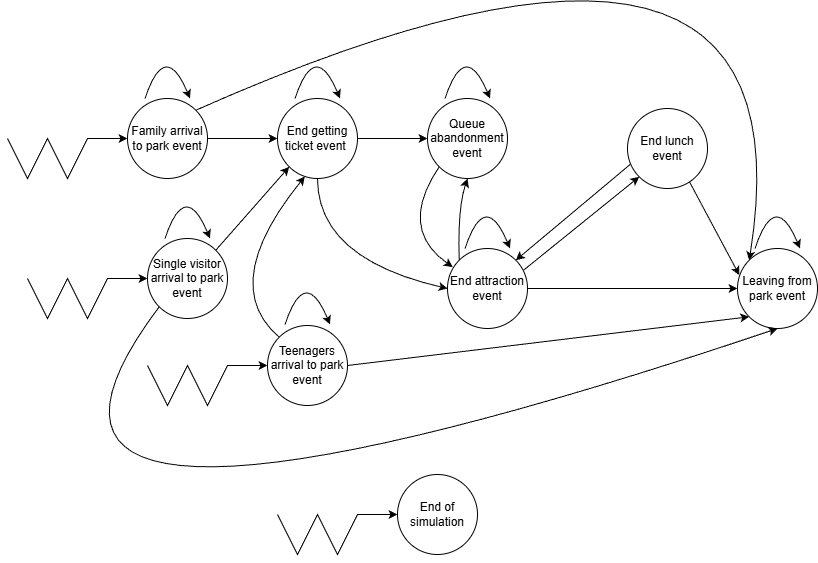
## **:תרשים טיפול - אירוע נטישת תור**
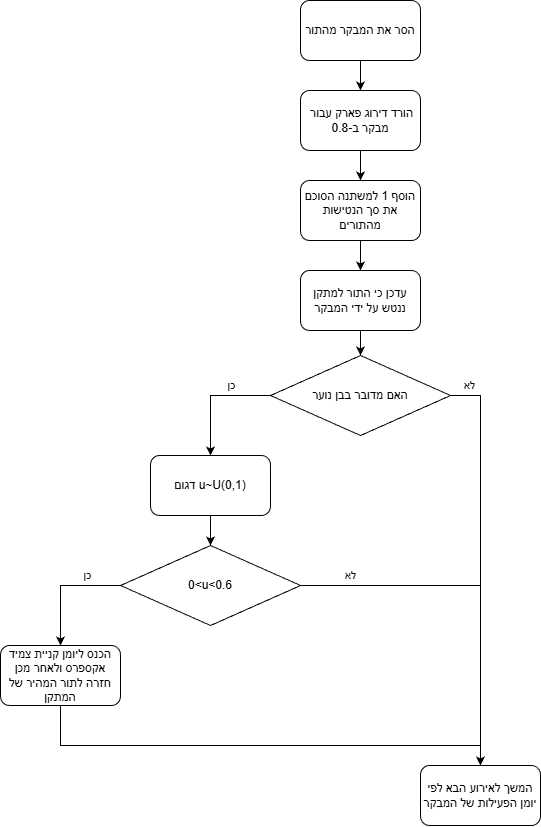
## **:תרשים טיפול - אירוע סיום ארוחת צהריים**
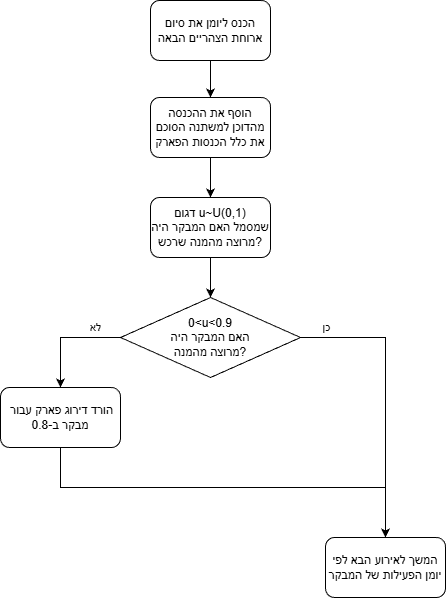
## **:תרשים טיפול - אירוע סיום אטרקציה**
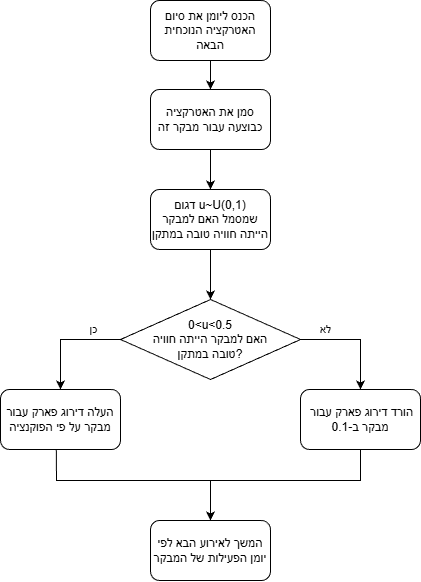


## **בחירת מדדים:**

**הרווח הכולל של הפרק**

הרווח הכולל של הפארק הוא מדד הביצוע המרכזי הבוחן את הצלחתו הכלכלית של המודל. הרווח נגזר ממכירת כרטיסים, רכישה חד-פעמית בדוכני המזון, ורכישת תמונות ביציאה. מאחר שרכישת תמונות מותנית בשביעות הרצון של המבקר, מדד זה משמש כבבואה לרמת ההנאה שהופקה מהביקור.

**זמן המתנה ממוצע בתור**

זמן המתנה ממוצע בתור (כלל-פארקי) מהווה אינדיקציה ליעילות התפעולית ולעומס על תשתיות הפארק. במודל הנוכחי, זמן ההמתנה הוא גורם שמשפיע מאוד על חוויית המשתמש; המתנה ממושכת שוחקת את הנאת המבקר ומורידה את הדירוג הסובייקטיבי שהוא מעניק לפארק, מה שמשפיע ישירות על נכונותו להשקיע ברכישת מזכרות ותמונות בסיום היום.

**אחוז נטישה מתורי האטרקציות**

אחוז נטישה מתורי אטרקציות הוא מדד התנהגותי המזהה כשלים נקודתיים וצווארי בקבוק. נטישה היא "הכרזת אי-אמון" של המבקר במתקן מסוים, והיא משמשת כמשתנה המוריד את דירוג הפארק באופן משמעותי. מעקב אחר אחוז הנטישה מאפשר להבין לא רק כמה זמן אנשים המתינו, אלא באיזה אחוז ההמתנה הפכה לבלתי נסבלת עבורם.

---

השילוב בין המדדים מאפשר לבחון את השרשרת הסיבתית בסימולציה: תפעול, חוויה,  רווח. בעוד שהכנסות מכרטיסים ואוכל הן יציבות יחסית, הרווח ממכירת תמונות הוא "רווח מבוסס רגש" . אם הסימולציה תראה זמני המתנה גבוהים ואחוזי נטישה גדלים, נוכל לצפות לירידה בדירוג הפארק ובהתאמה לירידה ברווח הכולל (למרות שכמות המבקרים לא השתנתה). המודל מאפשר לנו למצוא את "נקודת הקריסה" של החוויה – זו שמעבר לה, העומס כבר לא משתלם כלכלית כי הוא פוגע במכירות הקצה ביציאה.

# Visitiors Classes


In [ ]:
class Visitor:
  def __init__(self, rank, age, group):
    self.rank = 10.0 # דירוג התחלתי
    self.group = group
    self.age = age #צריך להבין איפה מג'נרטים ברנדומליות גיל
    self.activity_diary = []

  def add_rank(self, adrenaline_level):
    # נוסחת הציון
    GS = self.group.amount_of_members
    score = (((GS - 1) / 5 )* 0.3) + (((adrenaline_level - 1) / 4) * 0.7)
    self.rank = min(10,self.rank + score)

  def decrease_rank(self, penalty):
    self.rank = max(0, self.rank - penalty)

  #implements the success of an activity during the day
  def enter_successful(self, activity):
    for act in self.activity_diary:
      if act[0] == activity:
        act[1] = True
        break

  #implements the failiure when abandoning a queue for an activity
  def failed_attempt(self, activity):
    for act in self.activity_diary:
      if act[0] == activity:
        act[2] = True
       # self.group.last_abandoned = act[0]
        break


class Group:
  def __init__(self, amount_of_members, max_wait_time):
    self.has_express = random.random() < 0.25
    self.amount_of_members = amount_of_members
    self.members = []
    self.pictures_cost = 0
   # self.last_abandoned = None
    self.max_wait_time = max_wait_time
    self.decided_on_lunch = False

  def increase_rank(self, adrenaline_level):
    for Visitor in self.members:
        Visitor.add_rank(adrenaline_level)

  def decrease_rank(self, decrease_value):
    for Visitor in self.members:
        Visitor.decrease_rank(decrease_value)

  # Generates the activity diary of the group in the beginning, Forces the inheritors to write this function
  def generate_activity_diary(self):
    pass

  # Returns the next possible activities that the group needs to proceed to, Forces the inheritors to write this function
  def get_candidate_activities(self, last_activity_tried):
    pass

  # Checkes if the first 'count' activities have already completed
  def is_phase_finished(self, count):
    return all(act[1] for act in self.members[0].activity_diary[:count])

  # Finds the minimal age on the group
  def find_min_age(self):
    minAge = self.members[0].age
    for i in range(1, len(self.members)):
      if (self.members[i].age < minAge)
        minAge = self.members[i].age
    return minAge

  def purchase_pictures(self):
    avg_rank = sum(m.rank for m in group.members) / len(group.members)

    # Charge according to average rank
    if avg_rank >= 8.5:
      # 10 photos and a video
      self.pictures_cost = 120
    elif 7.5 <= avg_rank < 8.5:
      # 10 photos
      self.pictures_cost = 100
    elif 6.0 <= avg_rank < 7.5:
      # 1 photo
      self.pictures_cost = 20
    else:
      #Not buying photos
      self.pictures_cost = 0


 class SingleVisitor(Group):
  def __init__(self, age = 35):
    super().__init__(amount_of_members=1, max_wait_time=30)

  @staticmethod
  def CreateSingleVisitor()
    new_single_visitor = SingleVisitor()
    # Using reasonable upper bound of 30, choosing continous uniform distribution
    single_visitor_age = Algorithm.sample_continuous_uniform(18, 30)
    single_visitor = Visitor(rank=10, age= single_visitor_age, group=new_single_visitor)
    new_single_visitor.members.append(single_visitor)

  def get_candidate_activities(self, last_activity_tried):
    # Dividing the diary to 2 phases - before finishing the rides for ages 12 or more and after it
    phase1 = self.members[0].activity_diary[:3]
    phase2 = self.members[0].activity_diary[3:]

    # Wer'e on phase 1
    if not all(act[1] for act in phase1):
      candidates = [act[0] for act in phase1 if not act[1] and act[0] != last_activity_tried]

    # Wer'e on phase 2
    else:
      candidates = [act[0] for act in phase2 if not act[1] and act[0] != last_activity_tried]

    return candidates

#זמני הגעה וכמות משתתפים יג'ונרטו באירועים?
class Family(Group):
  def __init__(self):
    self.split = False
    super().__init__(amount_of_members = 2 + Algorithm.sample_number_of_children(1,5),15)
    self.split_groups = []
    self.leave_time = Algorithm.sample_family_leaving_time()
    # Decide if family will split (60% chance)
    self.will_split = random.random() < 0.6


  @staticmethod
  def CreateFamily() # creates family, decides ages...
    new_family = Family()
    num_children = new_family.amount_of_members - 2
    # Create 2 parents
    for i in range(2):
      parent_age = 35  # Assuming all parents are 35
      parent = Visitor(rank=10, age=parent_age, group=new_family)
      new_family.members.append(parent)
    # Create children
    for i in range(num_children):
      child_age = Algorithm.sample_continuous_uniform(2, 18)  # age uniform continuous [2,18]
      child = Visitor(rank=10, age=child_age, group=new_family)
      new_family.members.append(child)

    return new_family


  def generate_activity_diary(self):#including spilt
    # Generate for family only the rides for all ages
    self.members[0].activity_diary = [["Lazy River", False, False], ["Big Tube Slide", False, False]]
    random.shuffle(self.members[0].activity_diary)

    # Makes sure all of the family has the same diary
    for i in range(1, len(self.members) - 1):
      self.members[i].activity_diary = copy.deepcopy(self.members[0].activity_diary)

  def generate_final_activity_diary(self)
    if self.split:
      for group in self.split_groups:
        group.generate_activity_diary()
    else
      minAge = self.find_min_age
        if minAge >= 12:
          for member in self.members:
            member.activity_diary.extend(["Waves Pool", False, False], ["Small Tube Slide", False, False])
        if minAge >= 14:
          for member in self.members:
            member.activity_diary.extend(["Single Water Slide", False, False])
        if minAge >= 6:
          for member in self.members:
            member.activity_diary.extend(["Snorkeling Tour", False, False])
        if minAge <= 4:
          for member in self.members:
            member.activity_diary.extend(["Kids Pool", False, False])
      # לשים לב שצריך איפשהו בטיפול אירוע לשנות את הסדר של המתקנים לפי אורך תור

  def get_candidate_activities(self, last_activity_tried):
    # Phase 1 - before the decision on splitting
    phase1 = self.members[0].activity_diary[:2]

    # We're still on phase 1
    if not all(act[1] for act in phase1):
      return [act[0] for act in phase1 if not act[1] and act[0] != last_activity_tried]

    # We're after the decision on splitting
    phase2 = self.members[0].activity_diary[2:]
    return [act[0] for act in phase2 if not act[1] and act[0] != last_activity_tried]


    def decide_on_split(self):
    # If already split, return existing split groups
    if self.split:
      return self.split_groups

    if self.will_split:
      self.split = True
      # Separate parents and children
      parents = [m for m in self.members if m.age >= 18]
      children = [m for m in self.members if m.age < 18]

      # Categorize children by age
      young_children = [c for c in children if c.age < 8]  # # Must have parent or 12+
      middle_children = [c for c in children if 8 <= c.age < 12]  # Independent
      older_children = [c for c in children if c.age >= 12]  # Can supervise

      # Decide number of groups (2 or 3, equal probability)
      if random.random() < 0.5
        num_groups = 2
      else:
        num_groups = 3

      if num_groups == 3 and self.can_split_into_three(self,  young_children, older_children, middle_children)
        self.split_groups = self.split_into_three_groups(parents, young_children, middle_children, older_children)

      else:
        self.split_groups = self.split_into_two_groups(parents, young_children, middle_children, older_children)

      # Generates the rest of the activities (after the family splitted)
      self.generate_final_activity_diary()
      return self.split_groups

    else: # Family doesn't split
        # Generates the rest of the activities (after the family decdided not to split)
        self.generate_final_activity_diary()
        return [self]

def distribute_children(self, children, num_groups, start_index=0):
  groups = [[] for _ in range(num_groups)]

  for i, child in enumerate(children[start_index:], start=start_index):
    group_index = i % num_groups
    groups[group_index].append(child)

  return groups

  #Split family to 2 groups
  def split_into_two_groups(self, parents, young, middle, older):

    # Start with parents
    group1_members = [parents[0]]
    group2_members = [parents[1]]

    # Distribute young children
    if young:
      # Distribute young children half and half
      young_groups = self.distribute_children(young, num_groups=2)
      group1_members.extend(young_groups[0])
      group2_members.extend(young_groups[1])

    # Distribute older children
    if older:
      older_groups = self.distribute_children(older, num_groups=2)
      group1_members.extend(older_groups[0])
      group2_members.extend(older_groups[1])

    # Distribute middle children
    middle_groups = self.distribute_children(middle, num_groups=2)
    group1_members.extend(middle_groups[0])
    group2_members.extend(middle_groups[1])

    # Create SplitedFamily objects
    return self.create_splitted_family([group1_members, group2_members])

  #Splitting a family to 3
  def split_into_three_groups(self, parents, young, middle, older):

    group1_members = [parents[0]]
    group2_members = [parents[1]]
    group3_members = [] # Group 3 is led by an older/middle child

    # Track remaining older and middle children
    remaining_older = older
    remaining_middle = middle


    if older:
      # Priority 1: An older child leads
      group3_members = [older[0]]
      remaining_older = older[1:]
    elif middle:
      # Priority 2: A middle child leads (if no older kids exist)
      group3_members = [middle[0]]
      remaining_middle = middle[1:]

    # Distribute young children
    if young:
      young_groups = self.distribute_children(young, num_groups=3)
      group1_members.extend(young_groups[0])
      group2_members.extend(young_groups[1])
      group3_members.extend(young_groups[2])

    # Distribute remaining older children
    if remaining_older:
      older_groups = self.distribute_children(remaining_older, num_groups=3)
      group1_members.extend(older_groups[0])
      group2_members.extend(older_groups[1])
      group3_members.extend(older_groups[2])

    # Distribute middle children
    if remaining_middle:
      middle_groups = self.distribute_children(middle, num_groups=3)
      group1_members.extend(middle_groups[0])
      group2_members.extend(middle_groups[1])
      group3_members.extend(middle_groups[2])

    # Create SplitedFamily objects
    return self.create_splitted_family([group1_members, group2_members, group3_members])

  #Check if a family can split into 3 according to instructions
  def can_split_into_three(self, young, older, middle):
    return len(older) + len(middle) > 0


  def create_splitted_family(self, sub_groups)
    # Create Splits
    for group in sub_groups:
      split_group = SplittedFamily(len(group), members, self)
      self.split_groups.append(split_group)


class SplittedFamily(Group):
  def __init__(self, amount_of_members, members, original_family):
    super().__init__(amount_of_members = amount_of_members,15)
    self.members = copy.deepcopy(members)
    self.original_family = original_family
    self.has_express = original_family.has_express
    self.leave_time = original_family.leave_time

    # Update group reference for each member
    for member in self.members:
      member.group = self

  def generate_activity_diary(self):
    minAge = self.find_min_age()
    if minAge >= 12:
      for member in self.members:
        member.activity_diary.extend(["Waves Pool", False, False], ["Small Tube Slide", False, False])
    if minAge >= 14:
      for member in self.members:
        member.activity_diary.extend(["Single Water Slide", False, False])
    if minAge >= 6:
      for member in self.members:
        member.activity_diary.extend(["Snorkeling Tour", False, False])
    if minAge <= 4:
        for member in self.members:
        member.activity_diary.extend(["Kids Pool", False, False])
    # לשים לב שצריך איפשהו בטיפול אירוע לשנות את הסדר של המתקנים לפי אורך תור

  def get_candidate_activities(self, last_activity_tried):

    # Phase 1 - before the decision on splitting
    phase1 = self.members[0].activity_diary[:2]

    # We're still on phase 1
    if not all(act[1] for act in phase1):
      return [act[0] for act in phase1 if not act[1] and act[0] != last_activity_tried]

    # We're after the decision on splitting
    phase2 = self.members[0].activity_diary[2:]
    return [act[0] for act in phase2 if not act[1] and act[0] != last_activity_tried]



class Teenagers(Group):
  def __init__(self):
    super().__init__(amount_of_members = Algorithm.sample_number_of_teenagers(), 20)

  @staticmethod
  def createTeenagers():
    new_teenage_group = Teenagers()
    # Create teenager members
    for i in range(new_teenage_group.amount_of_members):
        # Using reasonable upper bound of 17, choosing continous uniform distribution
        teen_age = Algorithm.sample_continuous_uniform(14, 17)
        teen = Visitor(rank=10, age=teen_age, group=new_teenage_group)
        new_teenage_group.members.append(teen)

  @staticmethod
  def buy_express(Teenagers):
    Teenagers.has_express = True
    return amount_of_members * 50

  def generate_activity_diary(self):
    # Generate for teenagers only the rides with 3 or more waves
    self.members[0].activity_diary = [["Single Water Slide", False, False], ["Small Tube Slide", False, False], ["Waves Pool", False, False], ["Snorkeling Tour", False, False]]
    random.shuffle(self.members[0].activity_diary)

    # Makes sure all the teenagers have the same diary
    for i in range(1, len(self.members) - 1):
      self.members[i].activity_diary = copy.deepcopy(self.members[0].activity_diary)

  def get_candidate_activities(self, last_activity_tried):
    # If we have express we don't care about the last activity
    if self.has_express:
      return [act[0] for act in self.members[0].activity_diary if not act[1]]

    # If we don't have express we care about the last activity
    return [act[0] for act in self.members[0].activity_diary if not act[1] and act[0] != last_activity_tried]



IndentationError: unindent does not match any outer indentation level (<tokenize>, line 175)

#Facility Classes

In [ ]:
class Park:
  def __init__(self):
    self.visitor_groups = []
    self.total_revenue = 0
    self.avg_rank = 0
    self.facilities = {} # a dictionary for all the park's facilities
    self.queues = {} # a dictionary for all the park's queues
    self.opening_hour = datetime(2025, 1, 1, 9, 0)
    self.closing_hour = datetime(2025, 1, 1, 19, 0)
    create_rides_and_food_stands()

  def create_rides_and_food_stands(self):
    # Setting all the park's facilities
    self.facilities["Park Entrance"] = ParkEntrance()
    self.facilities["Lazy River"] = LazyRiverAttraction()
    self.facilities["Single Water Slide"] = SingleWaterSlideAttraction()
    self.facilities["Big Tube Slide"] = BigTubeSlideAttraction()
    self.facilities["Small Tube Slide"] = SmallTubeSlideAttraction()
    self.facilities["Waves Pool"] = WavesPoolAttraction()
    self.facilities["Kids Pool"] = KidsPoolAttraction()
    self.facilities["Snorkeling Tour"] = SnorkelingTourAttraction()
    self.facilities["Pizza stand"] = PizzaFoodStand()
    self.facilities["Hamburger stand"] = HamburgerFoodStand()
    self.facilities["Salad stand"] = SaladFoodStand()

    # Setting all the park's queues
    self.queues["Park Entrance"] = Queue("Park Entrance")
    self.queues["Lazy River"] = Queue("Lazy river")
    self.queues["Single Water Slide"] = Queue("Single Water Slide")
    self.queues["Big Tube Slide"] = Queue("Big Tube Slide")
    self.queues["Small Tube"] = Queue("Small Tube Slide")
    self.queues["Waves Pool"] = Queue("Waves Pool")
    self.queues["Kids Pool"] = Queue("Kids Pool")
    self.queues["Snorkeling Tour"] = Queue("Snorkeling Tour")


  def is_open(self, current_time):
    # Cheks if the stand is open according to the simulation time
    return self.opening_hour <= current_time <= self.closing_hour

  def cacl_amount_of_visitors(self):
    amount_of_visitors = 0
    for vg in self.visitor_groups:
      for m in vg.members:
        amount_of_visitors += 1

  def calc_avg_ranking(self):
    if not self.visitor_groups:
      self.avg_rank = 0
      return 0
    # Calculate the rating by suming all the rates and dividing by number of visitors
    total_rank = 0
    for vg in self.visitor_groups:
      for m in vg.members:
        total_rank += m.rank
    self.avg_rank = total_rank / self.cacl_amount_of_visitors
    return self.avg_rank

  def calc_total_revenue(self):
    return self.facilities["Park Entrance"].total_revenue +
           self.facilities["Pizza stand"].total_revenue +
           self.facilities["Hamburger stand"].total_revenue +
           self.facilities["Salad stand"].total_revenue +
           sum(v.pictures_cost for v in self.visitor_groups)

class Facility:
  def __init__(self, name, num_servers, capacity_per_server):
    self.name = name
    self.available_servers = num_servers
    self.capacity_per_server = capacity_per_server
    self.queue = SmartQueue(name)
    self.total_revenue = 0

  def is_idle(self):
    return self.available_servers > 0

  def assign_server(self):
    self.available_servers -= 1

  def release_server(self):
    self.available_servers += 1

class ParkEntrance(Facility):
  def __init__(self, num_servers=3):
    super().__init__("Park Entrance", num_servers=num_servers, capacity_per_server=1)
    self.total_revenue = 0

  def calculate_and_charge(self, group):
    # חישוב מחיר כניסה ועדכון הכנסות
    group_total_cost = 0
    for member in group.members:
      # תמחור לפי גיל
      if member.age >= 14:
        ticket_price = 150
      else:
        ticket_price = 75

    # תוספת אקספרס לקבוצה (המחיר הוא לכל חבר בקבוצה)
    if group.has_express:
      ticket_price += 50

    group_total_cost += ticket_price

    self.total_revenue += group_total_cost
    return group_total_cost



# Rides Classes

In [ ]:
class Attraction(Facility):
    def __init__(self, name, adrenalinLevel, minAge, availableServers, rideCapacity):
        super().__init__(name, availableServers, rideCapacity)
        self.adrenalinLevel = adrenalinLevel
        self.minAge = minAge

    def get_ride_time(self, isFirst = False):
      pass

class LazyRiverAttraction(Attraction):
    def __init__(self):
      super().__init__("Lazy River", adrenalinLevel=1, minAge=0, availableServers=1, rideCapacity=60)
      self.tubeCapacity = 2
      self.occupiedTubes = 0

    def get_ride_time(self):
      return sample_continuous_uniform(20,30)


class SingleWaterSlideAttraction(Attraction):
    def __init__(self):
        super().__init__("Single Water Slide", adrenalinLevel=5, minAge=14, availableServers=2, rideCapacity=1)
        self.newRiderTime = 0.5  # חצי דקה מיוצגת כ-0.5 יחידות זמן

    def get_ride_time(self, isFirst):
      if isFirst:
        return 3
      return 0.5

class BigTubeSlideAttraction(Attraction):
    def __init__(self):
      super().__init__("Big Tube Slide", adrenalinLevel=2, minAge=0, availableServers=1, rideCapacity=1)
      self.tubeCapacity = 8

    def get_ride_time(self):
      return sample_normal(4.800664, 1.823101)

class SmallTubeSlideAttraction(Attraction):
    def __init__(self):
        super().__init__("Small Tube Slide", adrenalinLevel=4, minAge=12, availableServers=1, rideCapacity=1)
        self.tubeCapacity = 3

    def get_ride_time(self):
      return sample_exponential(2.107060)

class WavesPoolAttraction(Attraction):
    def __init__(self):
        super().__init__("Waves Pool", adrenalinLevel=3, minAge=12, availableServers=1, rideCapacity=80)

    def get_ride_time(self):
      return generate_wavepool_time()

class KidsPoolAttraction(Attraction):
    def __init__(self):
        super().__init__("Kids Pool", adrenalinLevel=1, minAge=0, availableServers=1, rideCapacity=30)
        self.maxAge = 4

    def get_ride_time(self):
      return generate_kids_pool_time() * 60

class SnorkelingTourAttraction(Attraction):
    def __init__(self):
        super().__init__("Snorkeling Tour", adrenalinLevel=3, minAge=6, availableServers=2, rideCapacity=30)
        self.guide_break_duration = 30
        # חשוב: guides_ready_time חייב להכיל אובייקט datetime מלא
        self.guides_ready_time = [time(9,0)] * 2

    def get_ride_time(self):
      return sample_normal(30, 10)

    def is_idle(self, current_time):
        # בדיקת הפסקת צהריים
        if 13 <= current_time.hour < 14:
            return False
        # בדיקה אם יש מדריך שסיים הפסקה
        return any(ready_time <= current_time for ready_time in self.guides_ready_time)

    def assign_server(self, current_time):
        for i in range(len(self.guides_ready_time)):
            if self.guides_ready_time[i] <= current_time:
                self.guides_ready_time[i] = datetime.max # נועלים
                self.available_servers -= 1
                return i
        return None

    def release_server(self, guide_index, finish_time):
        # חישוב זמן מוכנות (סיום + 30 דקות)
        next_ready = finish_time + timedelta(minutes=self.guide_break_duration)
        self.guides_ready_time[guide_index] = next_ready
        self.available_servers += 1

#Foodstand Classes

In [ ]:
class FoodStand:
  def __init__(self, name):
    self.name = name
    self.bad_meal_prob = 0.1 # הסתברות למנה לא טובה (0.1 במצב רגיל)
    self.total_revenue = 0
    self.opening_hour = datetime(2025, 1, 1, 13, 0)
    self.closing_hour = datetime(2025, 1, 1, 15, 0)

  @staicmethod
  def decide_on_stand():
    rand = random.random()
    if rand < 3/8:  # 3/8 prefer burger
      return "burger"
    elif 3/8 < rand < 5/8:  # 1/4 prefer pizza
      return "pizza"
    else:  # Prefer salad
      return "salad"
  def calculate_service_and_eating(self):
    # שירות: נורמלי (תוחלת 5, סטיית תקן 1.5)
    service_time = Algorithm.sample_normal(5, 1.5)
    # אכילה: אחיד (15-35 דקות)
    eating_time = Algorithm.sample_continuous_uniform(15, 35)
    return service_time + eating_time

  def get_total_duration(self, group):
    # פונקציה אבסטרקטית לחישוב זמן הכנה + זמן שירות ואכילה
    pass

  def is_open(self, current_time):
    # בדיקה האם הדוכן פתוח לפי השעה בסימולציה
    return self.opening_hour <= current_time <= self.closing_hour

  def process_meal(self, group):
    # פונקציה מרכזית שמופעלת מה-Event: מחשבת הכנסה ובודקת איכות מנה (השפעה על הדירוג).

    # חישוב הכנסה לפי סוג הדוכן והקבוצה
    income = self.calculate_income(group)
    self.total_revenue += income

    # לוגיקת מנה לא טובה (מוריד 0.8 מהדירוג)
    if random.random() < self.bad_meal_prob:
        group.decrease_rank(0.8)

  def calculate_income(self, group):
    # שיטה אבסטרקטית שחייבת מימוש בכל דוכן
    pass

class PizzaFoodStand(FoodStand):
  def __init__(self):
    super().__init__("Pizza Stand")
    self.prices = {"Personal": 40, "Group": 100}

  def calculate_income(self, group):
    if isinstance(group, Family) or isinstance (group, Teenagers):
        return self.prices["Group"]
    return self.prices["Personal"]

  def get_total_duration(self,group):
    prep_time=Algorithm.sample_continuous_uniform(4, 6)
    return prep_time + self.calculate_service_and_eating()

class HamburgerFoodStand(FoodStand):
  def __init__(self):
    super().__init__("Hamburger Stand")

  def get_total_duration(self,group):
    prep_per_person=Algorithm.sample_continuous_uniform(3, 4)
    prep_time = len(group.members) * prep_per_person
    return prep_time + self.calculate_service_and_eating()

  def calculate_income(self, group):
    return 100 * len(group.members)

class SaladFoodStand(FoodStand):
  def __init__(self):
    super().__init__("Salad Stand")

  def calculate_income(self, group):
    return 65 * len(group.members)

  def get_total_duration(self,group):
    prep_per_person=Algorithm.sample_continuous_uniform(3, 7)
    prep_time = len(group.members) * prep_per_person
    return prep_time + self.calculate_service_and_eating()

# Queue Classes

In [ ]:
class Queue:
  def __init__(self, facility_name):
    self.facility_name = facility_name
    self.queue = []
    self.waiting_times = []
    self.renege_waiting_times = []
    self.renege_count = 0
    self.last_change_time = 0
    self.weighted_queue_length_sum = 0

  def add_to_park_entrance(self, group):
    self.queue.append(group)

  def pop_from_park_entrance(self):
    return self.queue.pop(0)

  def add_group(self, group, current_time):
    self._update_weighted_length(current_time)
    group.entry_time = current_time
    if group.has_express:
      insert_pos = 0
      for i, g in enumerate(self.queue):
          if g.has_express: insert_pos = i + 1
          else: break
      self.queue.insert(insert_pos, group)
    else:
      self.queue.append(group)

  def remove_group_on_renege(self, group, current_time):
    if group in self.queue:
      self._update_weighted_length(current_time)
      self.renege_waiting_times.append(current_time - group.entry_time)
      self.renege_count += 1
      self.queue.remove(group)
      if not isinstance(group,Teenagers):
        group.decrease_rank(0.8)
      return True
    return False

  def dispatch_groups(self, capacity, current_time):
    self._update_weighted_length(current_time)
    selected_groups = []
    remaining_capacity = capacity
    i = 0
    while i < len(self.queue) and remaining_capacity > 0:
      group = self.queue[i]
      if group.amount_of_members <= remaining_capacity:
        self.queue.pop(i)
        selected_groups.append(group)
        remaining_capacity -= group.amount_of_members
        self.waiting_times.append(current_time - group.entry_time)
      else:
        i += 1
    return selected_groups

  def _update_weighted_length(self, current_time):
    duration = current_time - self.last_change_time
    self.weighted_queue_length_sum += len(self.queue) * duration
    self.last_change_time = current_time

#Event Classes

In [ ]:
class Event:
  def __init__(self, time):
    self.time = time

  def __lt__(self, other):
    return self.time < other.time  # Ensure the heap sorts by time

  def handle(self, simulation):
    pass

  def updateRating(self):
    pass

class SingleVisitorArrivalEvent(Event):
  def __init__(self, time, group):
    super().__init__(time)
    self.group = group

  def handle(self, simulation):

    # handeling the current arrival
    if self.time <= datetime(2025, 1, 1, 18, 30):
      if simulation.queue_parkEntrance.queue:
        simulation.queue_parkEntrance.add_to_park_entrance(self.group)
      else:
        service_time = self.time + timedelta(minutes=Algorithm.sample_continuous_uniform(0.5, 2))
        service_time += timedelta(minutes=Algorithm.sample_exponential(2))
        simulation.schedule_event(EndGettingTicketEvent(service_time, self.group))

    # 1.5 a minute
    time_until_next_arrival = Algorithm.sample_exponential(1.5)
    next_arrival_time = self.time + timedelta(minutes=time_until_next_arrival)

    # taking care of the next arrival event creation
    group = SingleVisitor.CreateSingleVisitor()
    if next_arrival_time.time() <= datetime(2025, 1, 1, 18, 30):
        simulation.schedule_event(SingleVisitorArrivalEvent(next_arrival_time, group))
    else:
        return
    # when next arrival time sampled is not within the arrival hours, the arrival event wil stop it's on creation


class FamilyArrivalEvent(Event):
  def __init__(self, time, group):
      super().__init__(time)
      self.group = group

  def handle(self, simulation):

    # handeling the current arrival
    if datetime(2025, 1, 1, 09, 00) <= self.time <= datetime(2025, 1, 1, 12, 00):
        if simulation.queue_parkEntrance.queue:
          simulation.queue_parkEntrance.add_to_park_entrance(self.group)
        else:
          service_time = self.time + timedelta(minutes=Algorithm.sample_continuous_uniform(0.5, 2))
          service_time += timedelta(minutes=Algorithm.sample_exponential(2))
          simulation.schedule_event(EndGettingTicketEvent(service_time, self.group))

    # 1.5 a minute
    time_until_next_arrival = Algorithm.sample_exponential(1.5)
    next_arrival_time = self.time + timedelta(minutes=time_until_next_arrival)

    # taking care of the next arrival event creation
    group = Family.CreateFamily()
    if  next_arrival_time.time() <= datetime(2025, 1, 1, 12, 00):
        simulation.schedule_event(FamilyArrivalEvent(next_arrival_time, group))
    else:
        return
    # when next arrival time sampled is not within the arrival hours, the arrival event wil stop it's on creation


class TeenagersArrivalEvent(Event):
  def __init__(self, time, group):
    super().__init__(time)
    self.group = group

  def handle(self, simulation):

  # handeling the current arrival
  if datetime(2025, 1, 1, 10, 00) <= self.time <= datetime(2025, 1, 1, 16, 00):
    if simulation.queue_parkEntrance.queue:
      simulation.queue_parkEntrance.add_to_park_entrance(self.group)
    else:
      service_time = self.time + timedelta(minutes=Algorithm.sample_continuous_uniform(0.5, 2))
      service_time += timedelta(minutes=Algorithm.sample_exponential(2))
      simulation.schedule_event(EndGettingTicketEvent(service_time, self.group))

  # 500 groups in a day (360 minutes) is a lambda of 18/25
  time_until_next_arrival = Algorithm.sample_exponential(18/25)
  next_arrival_time = self.time + timedelta(minutes=time_until_next_arrival)

  # taking care of the next arrival event creation
  group = Teenagers.CreateTeenagers()
  if next_arrival_time.time() <= datetime(2025, 1, 1, 16, 00):
      simulation.schedule_event(TeenagersArrivalEvent(next_arrival_time, group))
  else:
      return
  # when next arrival time sampled is not within the arrival hours, the arrival event wil stop it's on creation

class EndGettingTicketEvent(Event):
  def __init__(self, time, group):
    super().__init__(time)
    self.group = group

  def handle(self, simulation):
    # schedule the next group to end getting tickets
    if simulation.queue_parkEntrance.queue:
      service_time = self.time + timedelta(minutes=Algorithm.sample_continuous_uniform(0.5,2))
      service_time += timedelta(minutes=Algorithm.sample_exponential(2))
      simulation.schedule_event(EndGettingTicketEvent(service_time, simulation.queue_parkEntrance.pop_from_park_entrance()))

    # Getting the next activity for the group
    next_activity = simulation.get_best_next_activity(self.group, self.activity)

    # Handle sending the group to the next activity
    current_queue, current_ride = simulation.get_activity_queue_and_ride(next_activity)

    # Checks if the queue to the ride is empty or not
    if not current_queue and current_ride.is_idle(): # אין תור
      current_ride.assign_server()
      end_time = self.time + timedelta(minutes = current_ride.get_ride_time())
      simulation.schedule_event(EndAttractionEvent(end_time, self.group, next_activity))

    else:
      current_queue.add_group(self.group, self.time)
      # יוצרים אירוע נטישה בכל מקרה ואז מוחקים אותו מהיומן אירועים בסימולציה במידת הצורך
      next_abandonment_time = self.time + timedelta(minutes = self.group.max_wait_time)
      simulation.schedule_event(QueueAbandonmentEvent(next_abandonment_time, self.group, next_activity))

class LeavingEvent(Event):

class EndAttractionEvent(Event):
  def __init__(self, time, group, activity):
    super().__init__(time)
    self.group = group
    self.activity = activity

  def handle(self, simulation):
    # Mark the current activity as 'visited' and update the rank
    for member in self.group:
      self.group.members.enter_successful(self.activity)

    if (random.random() < 0.5):
      self.group.increase_rank(self.simulation.park.facilities[activity].adrenalinLevel)
    self.group.decrease_rank(0.1)

    # Handle lunch situation
    added_food_time = 0
    if datetime(2025, 1, 1, 13, 00) <= self.time.time() <= datetime(2025, 1, 1, 15, 00) and not self.group.decided_on_lunch:
      self.group.decided_on_lunch = True
      if (random.random() < 0.7):
        current_stand = FoodStand.decide_on_stand()
        added_food_time = simulation.park.facilities[current_stand].get_total_duration(self.group)
        simulation.park.facilities[current_stand].process_meal(self.group)

    # Create splited family after communal activities
    if isinstance (self.group, Family) and self.group.is_phase_finished(2): # Family that finished the last activity for all ages
      self.group.decide_on_split()
      for (splittedFamily in self.group.split_groups):
        # להכניס פה קוד כניסת כל משפחה מפוצלת אם בכלל לכל המתקנים

    # Getting the next activity for the group
    next_activity = simulation.get_best_next_activity(self.group, self.activity)

    # Handle leaving from park after completing all of the activities
    if not isinstance (self.group, Family) or not isinstance (self.group, SplittedFamily):
      if next_activity == None: # completed all activities
        simulation.schedule_event(LeavingEvent(self.time + added_food_time, self.group))

    # Handle sending the group to the next activity
    current_queue, current_ride = simulation.get_activity_queue_and_ride(next_activity)

    # Checks if the queue to the ride is empty or not
    if not current_queue and current_ride.is_idle(): # אין תור
      current_ride.assign_server()
      end_time = self.time + timedelta(minutes = current_ride.get_ride_time())
      simulation.schedule_event(EndAttractionEvent(end_time, self.group, next_activity))

    else:
      current_queue.add_group(self.group, self.time)
      # יוצרים אירוע נטישה בכל מקרה ואז מוחקים אותו מהיומן אירועים בסימולציה במידת הצורך
      next_abandonment_time = self.time + timedelta(minutes = self.group.max_wait_time)
      simulation.schedule_event(QueueAbandonmentEvent(next_abandonment_time, self.group, next_activity))

  def updateRating(self):

class EndLunchEvent(Event):
  def __init__(self, time, group):
      super().__init__(time)
      self.group = group

  def handle(self, simulation):
    # Choose restaurant based on preferences
   if FoodStand.decide_on_stand() == "burger":
    total_lunch_time = HamburgerFoodStand.get_total_duration(self,group)
   if FoodStand.decide_on_stand() == "pizza":
    total_lunch_time = PizzaFoodStand.get_total_duration(self,group)
   else:
    total_lunch_time = SaladFoodStand.get_total_duration(self,group)

    # Calculate actual end time
    lunch_end_time = self.time + timedelta(minutes=total_lunch_time)

    # Update rating if customer was unsatisfied (10% chance) and add income
    FoodStand.process_meal(self, group)

    # Get the next activity for the group
    activity = self.group.get_next_activity(None)#not sure


    def updateRating(self):
        # Rating update is handled in handle() method
        pass

  def handle(self, simulation):

  def updateRating(self):

class QueueAbandonmentEvent(Event):
  def __init__(self, time, group, activity):
    super().__init__(time)
    self.group = group
    self.activity = activity

    # לשים לב להוסיף בטיפול אירוע, כאשר נערים עוזבים וקונים צמיד, להוסיף את הקניית צמיד איכשהו להכנסות הכוללות בפארק

class EndOfSimulation(Event):
  def __init__(self):



SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (ipython-input-3869950980.py, line 51)

#Simulation Class

In [ ]:
class Simulation:
  def __init__(self):
    self.park = Park()
    self.clock = datetime(2025, 1, 1, 09, 00)
    self.event_diary =[] #minimum heap

  def run(self):

  def schedule_event(self, event):
    heapq.heappush(self.event_diary, event)

  # Gets the queue and the attraction based on the activity name
  def get_activity_queue_and_ride(self, activity):
    return self.park.queues[activity], self.park.facilities[activity]


  # Gets the next activity for the group
  def get_best_next_activity(self, group, last_activity_tried):

    # Finding the candidates for the next activities
    candidates = group.get_candidate_activities(last_activity_tried)

    if not candidates:
      return None

    # Teenagers don't care about the queue length
    if isinstance(group, Teenagers):
        return candidates[0]

    # Families in the first phase don't care about the queue length
    if isinstance(group, Family) and not group.is_phase_finished(2):
        return candidates[0]

    # Families in the second phase or single visitors seek for the shortest queue
    return self.find_shortest_in_list(candidates)

  def find_shortest_in_list(self, candidates):
    if not candidates:
        return None
    # פונקציית עזר למציאת המינימום לפי אורך התור בפארק
    return min(candidates, key=lambda name: len(self.park.queues[name].queue))